# Discrete distributions


- Definition (Probability Mass Function (PMF))

    - For a discrete random variable $X$ with possible values $x_1, x_2, x_3, \cdots , x_n$, a probability mass function $f(x_i)$ is a function such that:
    
        1. $f(x_i) \geq 0$
        2. $\sum^n_{i=1} f(x_i) = 1$
        3. $f(x_i) = P(X = x_i)$


- Definition (CDF for a discrete random variable)

    - For a discrete random variable $X$, $F(x)$ satisfies the following properties:
        1. $F(x)=P(X \leq x) = \sum_{x_i \leq x} f(x_i)$
        2. $0 \leq F(x) \leq 1$
        3. If $x \leq y$, then $F(x) \leq F(y)$
    - The CDF is defined on the real number line.
    - The CDF is a non-decreasing function of $X$ (*i.e.*, increases or stays constant as $x \to \infty $).


- Expected value and variance of a discrete random variable:

    - The expected value (also called the expectation or mean) of a discrete r.v. $X$ whose distinct possible values are $x_1, x_2, \dots$ is defined by
    $$\mu = E[X] = \sum_{i=1}^n x_i f(x_i)$$

    - The variance is defined as:
    $$\sigma^2 = E[(X − E[X])^2] = \sum_{i=1}^n (x_i - \mu)^2 f(x_i)$$
    
### Ejemplos de Variables Aleatorias Discretas

- V.A. $X$: Número de veces que se obtiene el número 6 al lanzar un dado $N$ veces.
Valores puntuales de toma $X: R(X) = {0,1,2,...N}$.
- V.A. $X$: El precio de cierta acción sube (si sube, $X = 1$, no sube $X = 0$). $R(X) = {0,1}.$
- V.A. $X$: Número de días que transcurren desde el día en que se vence una obligación crediticia y el día en que se cumple con dicha obligación.
$R(X) = {0,1,...,n,...}$.
- V.A. $X$: Número de créditos que un estudiante de P&E1 seleccionado al azar tiene inscritos este semestre
$R(X) = {m, m+1,..., M}$.
- V.A. $X$: Número de hermanos que tiene un estudiante de P&E1 seleccionado al azar.
$R(X) = {0,1,...,N}$.

### Ejemplo introductorio

Una de las variables relevantes en el desempeño de los cajeros automáticos de cierto
banco es el número de cajeros de la competencia situados en un radio de 500 metros a
la redonda del cajero.

De acuerdo con el análisis de información disponible al respecto, se sabe que la variable
aleatoria, $X$, que representa el número de cajeros de la competencia para un cajero
seleccionado al azar, tiene un rango, $R(X)$, donde $R(X) = \{0,1,2,3\}$ y se distribuye como:

| x | Número de observaciones |
|---|----|
| 0 | 4  |
| 1 | 8  |
| 2 | 16 |
| 3 | 12 |

Tenemos que:

$$
f(x)=\begin{cases}0.1, & x = 0\\ 0.2, & x = 1\\
                  0.4, & x = 2 \\
                  0.3, & x = 3 \\
                  0.0, & \text{otherwise}\\
      \end{cases}
$$

Y

$$
F(x)=\left\{\begin{array}{ll}
                  0.0,\ \text{if } x < 0 \\
                  0.1,\ 0 \leq x < 1 \\
                  0.3,\ 1 \leq x < 2  \\
                  0.7,\ 2 \leq x < 3  \\
                  1.0,\ x \geq 3  
                \end{array}
              \right.
$$

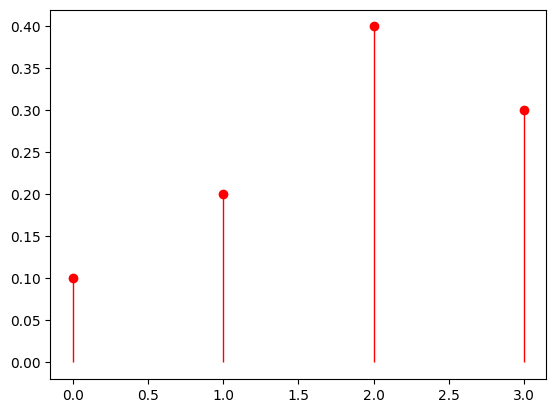

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pmf(x, pmfx):
    fig, ax = plt.subplots(1, 1)
    ax.vlines(x, 0, pmfx, colors='r', linestyles='-', lw=1)
    ax.plot(x, pmfx, 'ro', label='Pmf')
    plt.show()

x = np.arange(0, 4)
pmfx = np.array([.1, .2, .4, .3])
plot_pmf(x, pmfx)

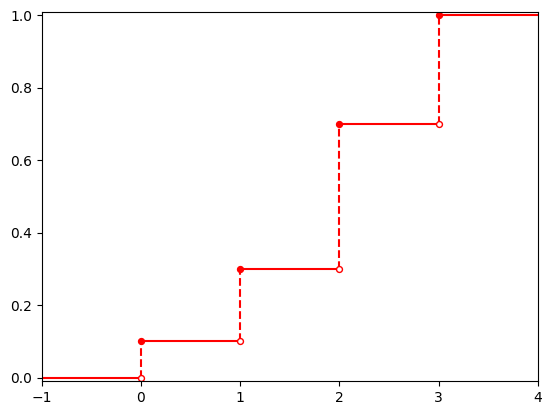

In [3]:
def plot_cdf(rvs_range, cdf_prob):
    yn = np.insert(cdf_prob, 0, 0)
    fig, ax = plt.subplots()
    ax.set_facecolor('white')
    ax.hlines(y=yn, xmin=rvs_range[:-1], xmax=rvs_range[1:],
              color='red', zorder=1)
    ax.vlines(x=rvs_range[1:-1], ymin=yn[:-1], ymax=yn[1:], color='red',
              linestyle='dashed', zorder=1)
    ax.scatter(rvs_range[1:-1], cdf_prob, color='red', s=18, zorder=2)
    ax.scatter(rvs_range[1:-1], yn[:-1], color='white', s=18, zorder=2,
               edgecolor='red')
    ax.grid(False)
    ax.set_xlim(rvs_range[0], rvs_range[-1])
    ax.set_ylim([-0.01, 1.01])
    plt.show()

x = np.arange(-1, 5)
cdfx = np.array([.1, .3, .7, 1.])  # CDF
plot_cdf(x, cdfx)

### Let's generate a rvs from the pmf above

- Calculate $E[X],\ Var[X]$ and contrast simulation with theoretical value

Simulated frequencies [0.0973 0.2025 0.4045 0.2957]
E[X] = 1.9 
Var[X] = 0.8900000000000001
Simulated:
Mean = 1.8986 
Var[X] = 0.8771180400000002


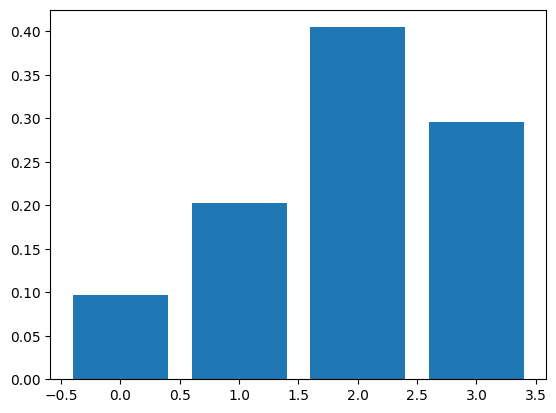

In [4]:
def atm_around(u):
    return np.where(cdf_atm > u)[0][0]

size = 10000
cdf_atm = np.array([.1, .3, .7, 1.])  # CDF
atms = [atm_around(np.random.rand()) for i in range(size)]
unique, counts = np.unique(atms, return_counts=True)
plt.bar(unique, counts / size)
print("Simulated frequencies", counts / size)

x = np.arange(0, 4)
px = np.array([.1, .2, .4, .3])    # PDF
ex = sum(x*px)
vx = sum((x**2)*px) - ex**2
print("E[X] =", ex, "\nVar[X] =", vx)
print("Simulated:\nMean =", np.mean(atms), "\nVar[X] =", np.var(atms))

# Bernoulli distribution


An r.v. $X$ is said to have the Bernoulli distribution with parameter $p$ if
$P(X = 1) = p$ and $P(X = 0) = 1 - p$, where $0 < p < 1$.
We write this as $X \sim Bern(p)$.

The symbol $\sim$ is read "is distributed as".
Any r.v. whose possible values are 0 and 1 has a $Bern(p)$ distribution,
with $p$ the probability of the r.v. equaling 1.
This number $p$ in $Bern(p)$ is called the parameter of the distribution;
it determines which specific Bernoulli distribution we have.
Thus there is not just one Bernoulli distribution,
but rather a family of Bernoulli distributions,
indexed by $p$. For example, if $X \sim Bern(1/3)$,
it would be correct but incomplete to say "$X$ is Bernoulli";
to fully specify the distribution of $X$, we should both say its
name (Bernoulli) and its parameter value (1/3),
which is the point of the notation $X \sim Bern(1/3)$.

**Bernoulli trial**. An experiment that can result in either a "success" or a "failure" (but not both) is called a Bernoulli trial. A Bernoulli random variable can be thought of as the indicator of success in a Bernoulli trial: it equals 1 if success occurs and 0 if failure occurs in the trial.

Because of this story, the parameter p is often called the success probability of the $Bern(p)$ distribution.

### PMF

From the table below:

| $x$ | $P(X=x)$ |   $f_X(x)$   |
|-----|----------|--------------|
|  0  | $1-p$    | $p^0 (1-p)^{1-0}$ |
|  1  | $p$      | $p^1 (1-p)^{1-1}$ |

We can write the PMF as follows:

$$f_X(x; p) = p^x (1-p)^{1-x},\ x \in \{0, 1\}$$

Try to calculate the expected value and variance of the Bernoulli distribution:

$$E[X] = p,\ Var[X] = p (1 - p)$$

### Python simulation

In [5]:
def bernoulli(p=0.5):
    """
    X ~ Bern(p)
    p: prob. de éxito
    Devuelve: x=1, con prob. p,
              0 con prob. 1 - p
    """
    if np.random.rand() < p:
        return 1  # Exito
    else:
        return 0  # Fracaso

print([bernoulli(0.3) for i in range(10)])

[0, 1, 0, 0, 0, 0, 1, 0, 0, 0]


# Binomial distribution


Once we start thinking about Bernoulli trials, it’s hard not to start thinking about what happens when we have more than one Bernoulli trial.

**Binomial distribution**. Suppose that n independent Bernoulli trials
are performed, each with the same success probability $p$. Let $X$ be the number of successes.
The distribution of $X$ is called the Binomial distribution with parameters $n$ and $p$.
We write $X \sim Bin(n,p)$ to mean that $X$ has the Binomial
distribution with parameters $n$ and $p$,
where $n$ is a positive integer and $0 < p < 1.$

Notice that we define the Binomial distribution not by its PMF, but by a story about the type of experiment that could give rise to a random variable with a Binomial distribution. The most famous distributions in statistics all have stories which explain why they are so often used as models for data, or as the building blocks for more complicated distributions.

Thinking about the named distributions first and foremost in terms of their stories has many benefits. It facilitates pattern recognition, allowing us to see when two problems are essentially identical in structure; it often leads to cleaner solutions that avoid PMF calculations altogether; and it helps us understand how the named distributions are connected to one another.
Here it is clear that $Bern(p)$ is the same distribution as $Bin(1, p)$:
the Bernoulli is a special case of the Binomial.

### PMF

Using the story definition of the Binomial, let's find its PMF.

An experiment consisting of $n$ independent Bernoulli trials produces a sequence of successes and failures. The probability of any specific sequence of $x$ successes and $n - x$ failures is $p^x(1 - p)^{n-k}$. There are ${n \choose x}$ such sequences, since we just need to select where the successes are. Therefore, letting $X$ be the number of successes,

$$P(X=x) = {n \choose x} p^x (1-p)^{n-x},\ x \in \{0, 1, \dots, n\}$$

Given a series of $n=3$ Bernoulli trials with success probability $p=0.5$ (coint tossing), the sample space is given by the figuer below:

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/binom.png" alt="drawing" width="700"/>

Then we can write the PMF as follows:

| $x$    | $P(X=x)$  | $f_X(x)$  |
|--------|-----------|-----------|
| 0   | $1/8$       | ${3 \choose 0} p^0 (1-p)^{3-0}$ |
| 1   | $3/8$       | ${3 \choose 1} p^1 (1-p)^{3-1}$ |
| 2   | $3/8$       | ${3 \choose 2} p^2 (1-p)^{3-2}$ |
| 3   | $1/8$       | ${3 \choose 3} p^3 (1-p)^{3-3}$ |

### Summary

$$X \sim Bin(x; n, p)$$

$$f_X(x; n, p) = {n \choose x} p^x (1-p)^{n-x},\ x \in \{0, 1, \dots, n\}$$

$$E[X] = np,\ Var[X] = n p (1 - p)$$

### Python simulation

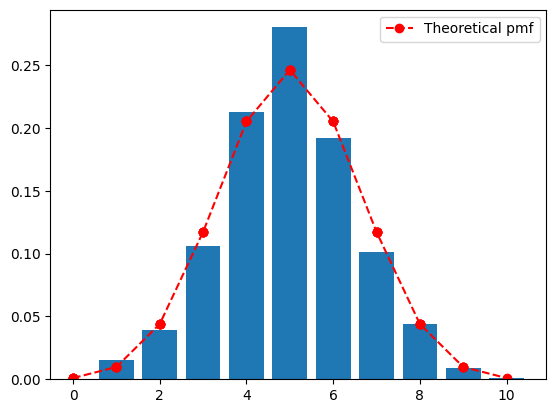

In [6]:
def binomial(n=1, p=0.5):
    x = 0
    for i in range(n):
        x = x + bernoulli(p)
    return x

n, p = 10, 0.5
size = 1000  # sequence length
RVS = [binomial(n, p) for i in range(size)]
unique, counts = np.unique(RVS, return_counts=True)
plt.bar(unique, counts / size)

from scipy.stats import binom
x = np.linspace(0, n, dtype='int')  # variable range
px = binom.pmf(x, n, p)
plt.plot(x, px, '--ro')
l = plt.legend(['Theoretical pmf'])

# Geometric distribution

Consider a sequence of independent Bernoulli trials,
each with the same success probability $p \in (0, 1)$,
with trials performed until a success occurs.
Let $X$ be the number of failures before the first successful trial.
Then $X$ has the Geometric distribution with parameter p;
we denote this by $X \sim Geom(p)$.

For example, if we flip a fair coin until it lands Heads for the first time,
then the number of Tails before the first occurrence of Heads is distributed as $Geom(1/2)$.

### PMF

To get the Geometric PMF from the story, imagine the
Bernoulli trials as a string of 0's (failures) ending in a single 1 (success).
Each 0 has probability $q = 1 - p$ and the final 1 has probability $p$,
so a string of $x$ failures followed by one success has probability $q^x p$.

| $x$| Experiment | $P(X=x)$ | $f_X(x)$ |
|----|------------|----------|----------|
| 0  |  1         | $p$      | $pq^{0}$ |
| 1  |  01        | $qp$     | $pq^{1}$ |
| 2  |  001       | $qqp$    | $pq^{2}$ |
| 3  |  0001      | $qqqp$   | $pq^{3}$ |
|  . |   .        |          |          |
|  . |   .        |          |          |

### Summary

$$X \sim Geom(x; p)$$

$$f_X(x; p) = p (1-p)^{x},\ x \in \{0, 1, 2, \dots \}$$

$$E[X] = \frac{q}{p},\ Var[X] = \frac{q}{p^2},\ q = 1 - p$$

### Python simulation

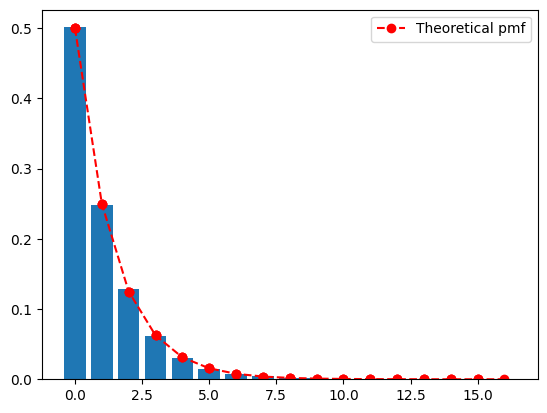

In [7]:
def geometric(p=0.5):
    x = 0
    while not bernoulli(p):
        x = x + 1
    return x

p = 0.5
size = 10000  # sequence length
RVS = [geometric(p) for i in range(size)]
unique, counts = np.unique(RVS, return_counts=True)
plt.bar(unique, counts / size)

from scipy.stats import geom
x = np.linspace(0, max(RVS), dtype='int')  # variable range
px = geom.pmf(x+1, p)
plt.plot(x, px, '--ro')
l = plt.legend(['Theoretical pmf'])

# Negative binomial

In a sequence of independent Bernoulli trials with success probability $p$,
if $X$ is the number of failures before the $r$th success,
then $X$ is said to have the Negative Binomial distribution
with parameters $r$ and $p$,
denoted $X \sim NBin(r, p)$.

Both the Binomial and the Negative Binomial distributions are based on
independent Bernoulli trials;
they differ in the stopping rule and in what they are counting:
the Binomial counts the number of successes in a fixed number of trials,
while the Negative Binomial counts the number of failures
until a fixed number of successes.

In light of these similarities, it comes as no surprise that
the derivation of the Negative Binomial PMF bears a resemblance
to the corresponding derivation for the Binomial.

### PMF

Example for $X \sim NBin(r=2, p=0.5)$:

| $x$ |Experiment | $P(X=x)$ | $f_X(x)$  |
|-----|-----------| ---------|-----------|
|  0  | 11        | $pp$     | ${0 + 2 - 1 \choose 2 - 1} p q^{0}$ |
|  1  | **01**1   | $qpp$    | ${1 + 2 - 1 \choose 2 - 1} p^2 q^{1}$ |
|  2  | **001**1  | $qqpp$   | ${2 + 2 - 1 \choose 2 - 1} p^2 q^{2}$ |
|  3  | **0001**1 | $qqqpp$  | ${3 + 2 - 1 \choose 2 - 1} p^2 q^{3}$ |
|  .  |   .       |          |           |
|  .  |   .       |          |           |

Note that the sequence in the experiment (in bold) can occur in multiple ways. Hence the combination part in the PMF $g_X(x)$ formula.

### Summary

$$X \sim NBin(x; r, p)$$

$$f_X(x; r, p) = {x + r - 1 \choose r - 1} p^r (1-p)^{x},\ x \in \{0, 1, 2, \dots\}$$

$$E[X] = \frac{qr}{p},\ Var[X] = \frac{qr}{p^2}, q=1-p.$$

### Python simulation

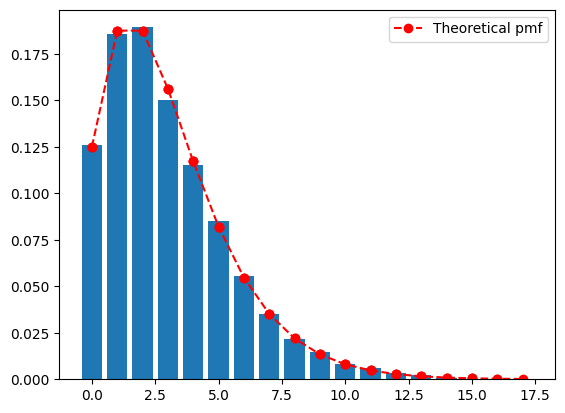

In [8]:
def nbin(r=1, p=0.5):
    x = 0
    for k in range(r):
        x = x + geometric(p)
    return x

r, p = 3, 0.5
size = 10000  # sequence length
RVS = [nbin(r, p) for i in range(size)]
unique, counts = np.unique(RVS, return_counts=True)
plt.bar(unique, counts / size)

from scipy.stats import nbinom
x = np.linspace(0, max(RVS), dtype='int')  # variable range
px = nbinom.pmf(x, r, p)
plt.plot(x, px, '--ro')
l = plt.legend(['Theoretical pmf'])

# Poisson distribution

The Poisson distribution is often used in situations where we are counting the number of successes in a particular region or interval of time, and there are a large number of trials, each with a small probability of success. For example, the following random variables could follow a distribution that is approximately Poisson.

- **The number of emails you receive in an hour.** There are a lot of people who could potentially email you in that hour, but it is unlikely that any specific person will actually email you in that hour. Alternatively, imagine subdividing the hour into milliseconds. There are $3.6\times10^6$ seconds in an hour, but in any specific millisecond it is unlikely that you will get an email.

- **The number of chips in a chocolate chip cookie.** Imagine subdividing the cookie into small cubes; the probability of getting a chocolate chip in a single cube is small, but the number of cubes is large.

- **The number of earthquakes in a year in some region of the world.** At any given time and location, the probability of an earthquake is small, but there are a large number of possible times and locations for earthquakes to occur over the course of the year.

We say that a r.v. has a Poisson distribution denoted by $X \sim Pois(\lambda)$.

The parameter $\lambda$ is interpreted as the rate of
occurrence of these rare events; in the examples above,
$\lambda$ could be 20 (emails per hour), 10 (chips per cookie),
and 2 (earthquakes per year).
The Poisson paradigm says that in applications similar to the ones above,
we can approximate the distribution of the number of events that occur
by a Poisson distribution.

### PMF

- We divide a continuous interval $t$ in $N$ parts of equal width $t/N$.
- The event of observing $x$ successes in a continuous interval $t$,
is equivalent to observing $x$ successes in $N$ Bernoulli experiments.
- The probability of a success $p=\lambda (t/N)$ depends only on the width $t/N$ and a rate of success $\lambda$.

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/line_plot.png" alt="drawing" width="500"/>

- From the binomial distribtuion we have that:
$$bin(x; N, \lambda (t/N)) = {N \choose x} \left(\frac{\lambda t}{N}\right)^x \cdot
\left(1 - \frac{\lambda t}{N}\right)^{N-x}$$

- We want to assure that only one success can occur in each subdivision of $t$,
this happens when $N \to \infty$. The we solve the following:

$$ \lim_{N \to \infty} \left[ {N \choose x} \left(\frac{\lambda t}{N}\right)^x \cdot
\left(1 - \frac{\lambda t}{N}\right)^{N-x} \right]$$

- We can rewrite the combination and the expression may be disassembled for the purpose of taking limits in the component parts:

$$ \lim_{N \to \infty} \left[ \frac{N!}{(N-x)! x!} \left(\frac{\lambda t}{N}\right)^x \cdot
\left(1 - \frac{\lambda t}{N}\right)^{N-x} \right]$$

$$ \frac{(\lambda t)^x}{x!} \cdot
\lim_{N \to \infty} \left[
\frac{N!}{(N-x)!N^x}
\right] \cdot
\lim_{N \to \infty} \left[
\left(1-\frac{\lambda t}{N}\right)^N \right] \cdot
\lim_{N \to \infty} \left[\left(1-\frac{\lambda t}{N}\right)^{-x}
\right]
$$

$$
\lim_{N \to \infty} \left[
\frac{N!}{(N-x)!N^x}
\right] =
\lim_{N \to \infty} \left[
\frac{N(N-1)\cdots(N-x+1)}{N^x}
\right] = 1
$$

$$
\lim_{N \to \infty}
\left[
\left(1-\frac{\lambda t}{N}\right)^N
\right] = e^{-\lambda t}
$$

$$
\lim_{N \to \infty}
\left[
{\left(1-\frac{\lambda t}{N}\right)^{-x}}
\right] = 1.
$$

On reassembling the parts, it is found that the the binomial function has a
limiting form of:

$$
\lim_{N \to \infty} bin(x;N,\lambda (t/N)) = \frac{(\lambda t)^x}{x!} e^{-\lambda t}
$$

Usually we use $t=1$, but if $\lambda$ is constant over the continuous interval,
we might use
$t \geq 1$.

### Summary

$$
X \sim Poiss(x; \lambda)
$$

$$
f_X(x; \lambda) = \frac{e^{-\lambda} \lambda^x}{x!},\ x \in \{0, 1, 2, \dots\}
$$

$$
E[X] = \lambda,\ Var[X] = \lambda
$$

### Python simulation

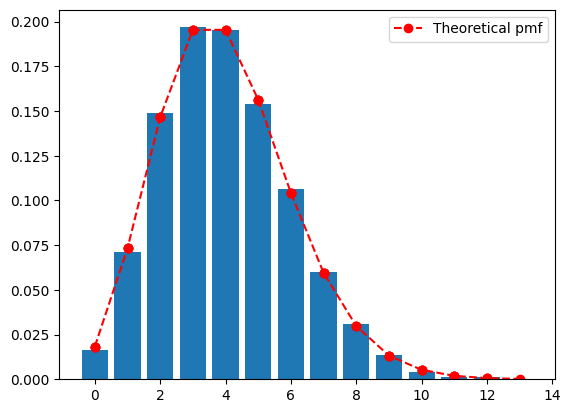

In [9]:
def poiss(lam):
    u = np.random.rand()
    cp = np.exp(-lam)
    k = 0
    factorial_k = 1
    while cp < u:
        k = k + 1
        factorial_k = factorial_k * k
        cp = cp + np.exp(-lam) * lam**k / factorial_k
    return k

lam = 4
size = 10000  # sequence length
RVS = [poiss(lam) for i in range(size)]
unique, counts = np.unique(RVS, return_counts=True)
plt.bar(unique, counts / size)

from scipy.stats import poisson
x = np.linspace(0, max(RVS), dtype='int')  # variable range
px = poisson.pmf(x, lam)
plt.plot(x, px, '--ro')
l = plt.legend(['Theoretical pmf'])

# Hypergeometric distribution

If we have an urn filled with $w$ white and $b$ black balls,
then drawing $n$ balls out
of the urn with replacement yields a $Bin(n, w/(w + b))$ distribution
for the number of white balls obtained in $n$ trials,
since the draws are independent Bernoulli trials,
each with probability $w/(w+b)$ of success.
If we instead sample without replacement,
then the number of white balls follows a
**Hypergeometric distribution**.

**Hypergeometric story.** An urn contains $w = 6$ white balls and $b = 4$ black balls. We
sample $n = 5$ without replacement. The number $X$ of white balls in the sample is
Hypergeometric; here we observe $X = 3$.

![](https://i.imgur.com/jGp0QIZ.png)

Consider an urn with $w$ white balls and $b$ black balls.
We draw $n$ balls out of the urn at random without replacement,
such that all $\binom{w+b}{n}$ samples are equally likely.
Let $X$ be the number of white balls in the sample.
Then $X$ is said to have the \textbf{Hypergeometric distribution}
with parameters $w, b$, and $n$; we denote this by
$X \sim \text{HGeom}(w, b, n),\
P(X=k)=\frac{\binom{w}{k}\binom{b}{n-k}}{\binom{w+b}{n}}$.

- If $X \sim \text{HGeom}(K, N, n)$, then the PMF
of $X$ is
$$
f_X(k; K, N, n) = P(X=k)=\frac{\dbinom{K}{k}\dbinom{N-K}{n-k}}{\dbinom{N}{n}}
$$
for integers $k$ satisfying $0 \leq k \leq K$ and
$0 \leq n-k \leq N-K$,
and $P(X=k)=0$ otherwise. That is, support: $k\in \{max(0,n+K-N),\dots,min(n,K)\}$.
- The mean and variance of the hypergeometric distribution are
$$
\mu=\frac{nK}{N}, \quad \sigma^2=n\frac{K}{N}\frac{(N-K)}{N}\frac{N-n}{N-1}
$$

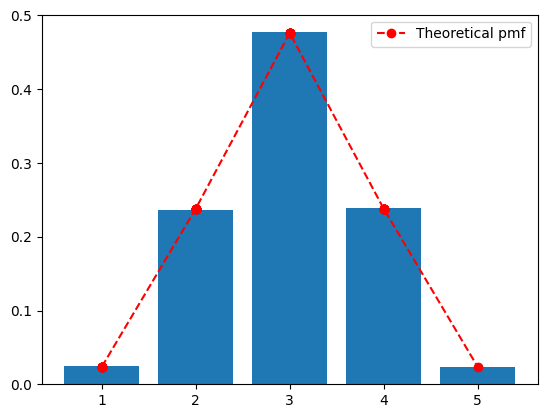

In [10]:
def urna(w, b, n):
    """
    w: number of white balls
    b: number of black balls
    n: sample size (without replacement)
    returns a string containing the sample of size n
    """
    bolas = 'w' * w + 'b' * b
    bL = [b for b in bolas]
    np.random.shuffle(bL)
    return ''.join(bL)[:n]


def sim_urna(w, b, n, rep):
    """
    Simulates urna sampling for a given number of
    repetitions (rep)
    returns a sequence containing the counts for the white balls
    """
    R = []
    for i in range(rep):
        R.append(urna(w, b, n).count('w'))
    return R

RVS = sim_urna(6, 4, 5, 10000)
unique, counts = np.unique(RVS, return_counts=True)
plt.bar(unique, counts / size)

from scipy.stats import hypergeom
x = np.linspace(min(RVS), max(RVS), dtype='int')  # variable range
px = hypergeom.pmf(x, 10, 6, 5)
plt.plot(x, px, '--ro')
l = plt.legend(['Theoretical pmf'])

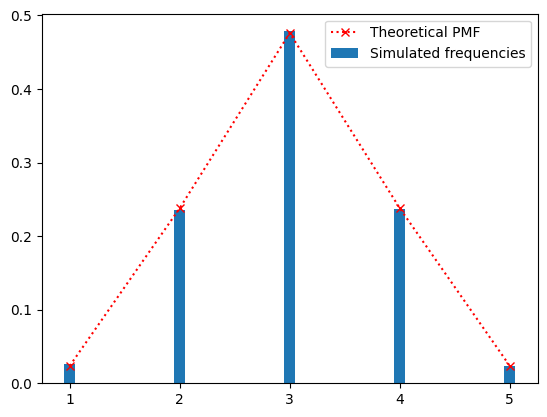

In [11]:
def hgeom(K, N, n):
    # K: white balls
    # N: total balls
    # n: sample size
    urn = K*[1] + (N-K)*[0]  # urn, 1: white, 0: black
    np.random.shuffle(urn)  # urn shuffle
    return sum(urn[:n])

K = 6  # white balss, n in python
N = 10  # Total balls, M in python
n = 5  # sample size, N in python
X = np.array([hgeom(K, N, n) for i in range(10000)])  # random vector
x, fx = np.unique(X, return_counts=True)  # count of unique values and frequencies
bp = plt.bar(x, fx/sum(fx), width=0.1, label="Simulated frequencies")  # barplot
plt.plot(x, hypergeom.pmf(x, n=K, N=n, M=N), ':xr', label="Theoretical PMF")  # Python implementation
l = plt.legend()

**Assignment 1:** For all the **discrete distributions** above, use the scipy.stats function to generate a random variate vector, and plot the theoretical pmf to compare with the generated frequencies. You can go to the wiki page of each distribution to replicate for the **parameters** given in the examples. Or go to the slides: https://drive.google.com/file/d/0B-dmEvN59Z2ZOF9US1RxcVRyQnc/view, and try the examples and excercises.
1. Generate RVS and plot bar graph with relative frequencies
2. Plot theoretical PMF and compare with bar diagram
3. Calculate theoretical E[X] and Var[X] and compare with sample mean and variance of RVS
4. Calculate cumulative frequencies of RVS in point **(1)**
5. Plot theoretical CDF and compare with point **(4)**


-----------------------Bernoulli-----------------------

La media teórica de Bernoulli es: 0.2
La varianza teórica de Bernoulli es: 0.16000000000000003
La media de Bernoulli es: 0.2
La varianza de Bernoulli es: 0.16000000000000003


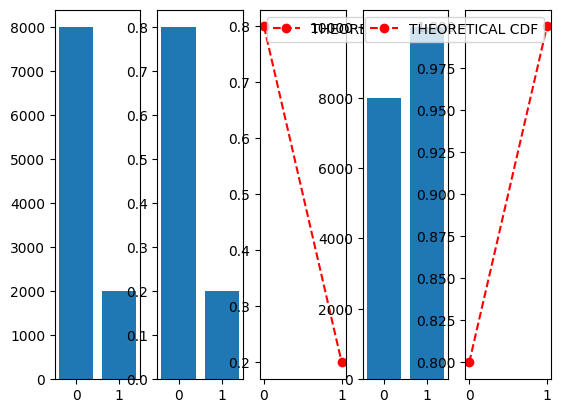


-----------------------Binomial Distribution-----------------------

La media teórica de la distribución binomial es: 3.0
La varianza teórica de la distribución binomial es: 2.0999999999999996
La media de la distribución binomial es: 2.9999999999999982
La varianza de la distribución binomial es: 2.099999999999999


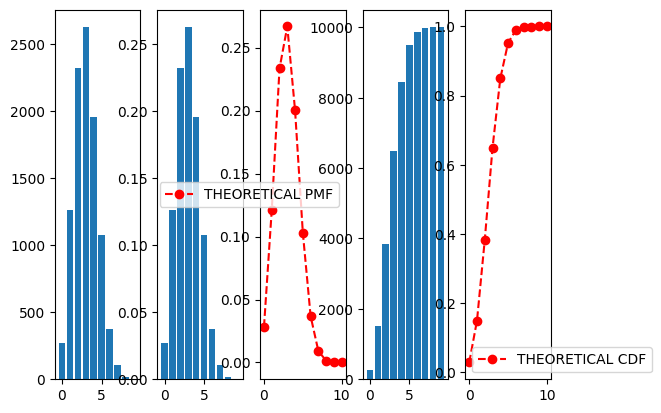


-----------------------Geometric Distribution-----------------------

La media teórica de la distribución geométrica es: 3.3333333333333335
La varianza teórica de la distribución geométrica es: 7.777777777777779
La media de la distribución geométrica es: 3.3305796724342893
La varianza de la distribución geométrica es: 7.713582413304683


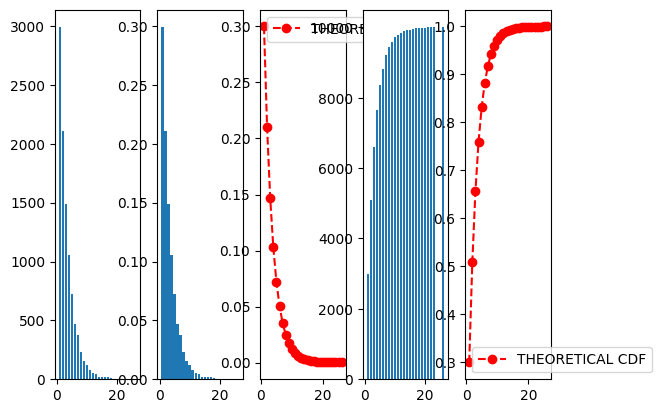


-----------------------Negative Binomial Distribution-----------------------

La media teórica de la distribución binomial negativa es: 11.666666666666668
La varianza teórica de la distribución binomial negativa es: 38.88888888888889
La media de la distribución binomial negativa es: 11.370792747742527
La varianza de la distribución binomial negativa es: 31.887341731379752


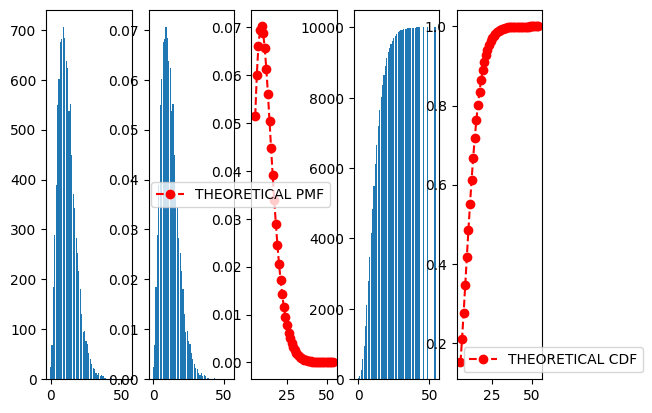


-----------------------Poisson Distribution-----------------------

La media teórica de la distribución de Poisson es: 3.0
La varianza teórica de la distribución de Poisson es: 3.0
La media de la distribución de Poisson es: 2.9999515528543332
La varianza de la distribución de Poisson es: 2.9995691374777973


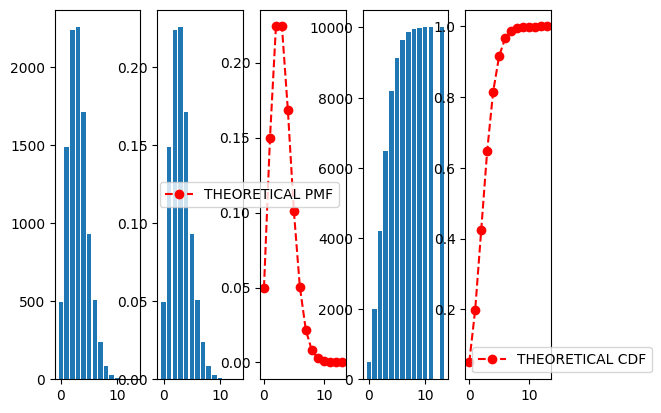


-----------------------Hypergeometric Distribution-----------------------

La media teórica de la distribución hipergeométrica es: 3.0
La varianza teórica de la distribución hipergeométrica es: 1.9090909090909092
La media de la distribución hipergeométrica es: 3.0000000000000004
La varianza de la distribución hipergeométrica es: 1.9090909090909092


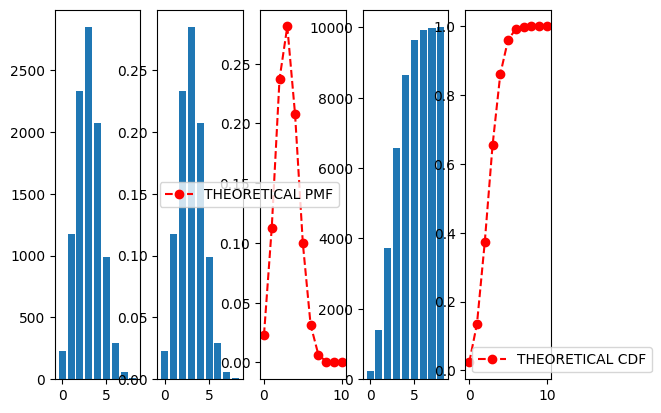

In [23]:
from scipy.stats import bernoulli, binom, geom, nbinom, hypergeom
print("""
-----------------------Bernoulli-----------------------
""")
# Punto 1
n, p = 10000, 0.2
size = 10000  # longitud de la secuencia
RVS = bernoulli.rvs(p, size=size)
unique, counts = np.unique(RVS, return_counts=True)
plt.subplot(1, 5, 1)
plt.bar(unique, counts)

# Punto 2
plt.subplot(1, 5, 2)
plt.bar(unique, counts / size)
x = np.array([0, 1])  # Para la distribución de Bernoulli solo hay dos posibles valores
px = bernoulli.pmf(x, p)
plt.subplot(1, 5, 3)
plt.plot(x, px, '--ro')
l = plt.legend(['THEORETICAL PMF'])

# Punto 3
media_t = bernoulli.mean(p)
varianza_t = bernoulli.var(p)
media = np.dot(x, px)
varianza = np.dot((x - media)**2, px)
print(f"La media teórica de Bernoulli es: {media_t}")
print(f"La varianza teórica de Bernoulli es: {varianza_t}")
print(f"La media de Bernoulli es: {media}")
print(f"La varianza de Bernoulli es: {varianza}")

# Punto 4
cumulative_freq = np.cumsum(counts)
plt.subplot(1, 5, 4)
plt.bar(unique, cumulative_freq)

# Punto 5
plt.subplot(1, 5, 5)
plt.plot(x, bernoulli.cdf(x, p), '--ro')
l = plt.legend(['THEORETICAL CDF'])

plt.show()


# Binomial distribution
print("""
-----------------------Binomial Distribution-----------------------
""")
# Punto 1
n, p = 10, 0.3
size = 10000  # longitud de la secuencia
RVS = binom.rvs(n, p, size=size)
unique, counts = np.unique(RVS, return_counts=True)
plt.subplot(1, 5, 1)
plt.bar(unique, counts)

# Punto 2
plt.subplot(1, 5, 2)
plt.bar(unique, counts / size)
x = np.arange(0, n+1)
px = binom.pmf(x, n, p)
plt.subplot(1, 5, 3)
plt.plot(x, px, '--ro')
l = plt.legend(['THEORETICAL PMF'])

# Punto 3
media_t = binom.mean(n, p)
varianza_t = binom.var(n, p)
media = np.dot(x, px)
varianza = np.dot((x - media)**2, px)
print(f"La media teórica de la distribución binomial es: {media_t}")
print(f"La varianza teórica de la distribución binomial es: {varianza_t}")
print(f"La media de la distribución binomial es: {media}")
print(f"La varianza de la distribución binomial es: {varianza}")

# Punto 4
cumulative_freq = np.cumsum(counts)
plt.subplot(1, 5, 4)
plt.bar(unique, cumulative_freq)

# Punto 5
plt.subplot(1, 5, 5)
plt.plot(x, binom.cdf(x, n, p), '--ro')
l = plt.legend(['THEORETICAL CDF'])

plt.show()

# Geometric distribution
print("""
-----------------------Geometric Distribution-----------------------
""")

# Punto 1
p = 0.3
size = 10000  # longitud de la secuencia
RVS = geom.rvs(p, size=size)
unique, counts = np.unique(RVS, return_counts=True)
plt.subplot(1, 5, 1)
plt.bar(unique, counts)

# Punto 2
plt.subplot(1, 5, 2)
plt.bar(unique, counts / size)
x = np.arange(1, max(RVS) + 1)
px = geom.pmf(x, p)
plt.subplot(1, 5, 3)
plt.plot(x, px, '--ro')
l = plt.legend(['THEORETICAL PMF'])

# Punto 3
media_t = geom.mean(p)
varianza_t = geom.var(p)
media = np.dot(x, px)
varianza = np.dot((x - media)**2, px)
print(f"La media teórica de la distribución geométrica es: {media_t}")
print(f"La varianza teórica de la distribución geométrica es: {varianza_t}")
print(f"La media de la distribución geométrica es: {media}")
print(f"La varianza de la distribución geométrica es: {varianza}")

# Punto 4
cumulative_freq = np.cumsum(counts)
plt.subplot(1, 5, 4)
plt.bar(unique, cumulative_freq)

# Punto 5
plt.subplot(1, 5, 5)
plt.plot(x, geom.cdf(x, p), '--ro')
l = plt.legend(['THEORETICAL CDF'])

plt.show()

# Negative Binomial distribution
print("""
-----------------------Negative Binomial Distribution-----------------------
""")

# Punto 1
k, p = 5, 0.3
size = 10000  # longitud de la secuencia
RVS = nbinom.rvs(k, p, size=size)
unique, counts = np.unique(RVS, return_counts=True)
plt.subplot(1, 5, 1)
plt.bar(unique, counts)

# Punto 2
plt.subplot(1, 5, 2)
plt.bar(unique, counts / size)
x = np.arange(k, max(RVS) + 1)
px = nbinom.pmf(x, k, p)
plt.subplot(1, 5, 3)
plt.plot(x, px, '--ro')
l = plt.legend(['THEORETICAL PMF'])

# Punto 3
media_t = nbinom.mean(k, p)
varianza_t = nbinom.var(k, p)
media = np.dot(x, px)
varianza = np.dot((x - media)**2, px)
print(f"La media teórica de la distribución binomial negativa es: {media_t}")
print(f"La varianza teórica de la distribución binomial negativa es: {varianza_t}")
print(f"La media de la distribución binomial negativa es: {media}")
print(f"La varianza de la distribución binomial negativa es: {varianza}")

# Punto 4
cumulative_freq = np.cumsum(counts)
plt.subplot(1, 5, 4)
plt.bar(unique, cumulative_freq)

# Punto 5
plt.subplot(1, 5, 5)
plt.plot(x, nbinom.cdf(x, k, p), '--ro')
l = plt.legend(['THEORETICAL CDF'])

plt.show()

# Poisson Distribution
print("""
-----------------------Poisson Distribution-----------------------
""")

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Punto 1
mu = 3
size = 10000  # longitud de la secuencia
RVS = poisson.rvs(mu, size=size)
unique, counts = np.unique(RVS, return_counts=True)
plt.subplot(1, 5, 1)
plt.bar(unique, counts)

# Punto 2
plt.subplot(1, 5, 2)
plt.bar(unique, counts / size)
x = np.arange(0, max(RVS) + 1)
px = poisson.pmf(x, mu)
plt.subplot(1, 5, 3)
plt.plot(x, px, '--ro')
l = plt.legend(['THEORETICAL PMF'])

# Punto 3
media_t = poisson.mean(mu)
varianza_t = poisson.var(mu)
media = np.dot(x, px)
varianza = np.dot((x - media)**2, px)
print(f"La media teórica de la distribución de Poisson es: {media_t}")
print(f"La varianza teórica de la distribución de Poisson es: {varianza_t}")
print(f"La media de la distribución de Poisson es: {media}")
print(f"La varianza de la distribución de Poisson es: {varianza}")

# Punto 4
cumulative_freq = np.cumsum(counts)
plt.subplot(1, 5, 4)
plt.bar(unique, cumulative_freq)

# Punto 5
plt.subplot(1, 5, 5)
plt.plot(x, poisson.cdf(x, mu), '--ro')
l = plt.legend(['THEORETICAL CDF'])

plt.show()

# hypergeometric distribution
print("""
-----------------------Hypergeometric Distribution-----------------------
""")

# Punto 1
N, K, n = 100, 30, 10
size = 10000  # longitud de la secuencia
RVS = hypergeom.rvs(N, K, n, size=size)
unique, counts = np.unique(RVS, return_counts=True)
plt.subplot(1, 5, 1)
plt.bar(unique, counts)

# Punto 2
plt.subplot(1, 5, 2)
plt.bar(unique, counts / size)
x = np.arange(max(0, n - (N - K)), min(n, K) + 1)
px = hypergeom.pmf(x, N, K, n)
plt.subplot(1, 5, 3)
plt.plot(x, px, '--ro')
l = plt.legend(['THEORETICAL PMF'])

# Punto 3
media_t = hypergeom.mean(N, K, n)
varianza_t = hypergeom.var(N, K, n)
media = np.dot(x, px)
varianza = np.dot((x - media)**2, px)
print(f"La media teórica de la distribución hipergeométrica es: {media_t}")
print(f"La varianza teórica de la distribución hipergeométrica es: {varianza_t}")
print(f"La media de la distribución hipergeométrica es: {media}")
print(f"La varianza de la distribución hipergeométrica es: {varianza}")

# Punto 4
cumulative_freq = np.cumsum(counts)
plt.subplot(1, 5, 4)
plt.bar(unique, cumulative_freq)

# Punto 5
plt.subplot(1, 5, 5)
plt.plot(x, hypergeom.cdf(x, N, K, n), '--ro')
l = plt.legend(['THEORETICAL CDF'])

plt.show()

**Assignment 2**: Tyrion, Cersey y otras 10 personas están sentadas en una mesa redonda, con una asignación de asientos completamente aleatoria. Cuál es la probabilidad qye Tyrion y Cersey se sientes juntos?

In [33]:
import random

def seating_arrangement():
    # Número total de personas
    total_personas = 12

    # Crear una lista de personas
    personas = list(range(total_personas))

    # Barajar aleatoriamente la lista para obtener una asignación aleatoria
    random.shuffle(personas)

    # Verificar si Tyrion y Cersei están juntos
    for i in range(total_personas):
        if personas[i] == 0 and personas[(i + 1) % total_personas] == 1:
            return True

    return False

# Número de simulaciones
num_simulaciones = 1000000
contadora_exito = 0

# Realizar simulaciones
for _ in range(num_simulaciones):
    if seating_arrangement():
        contadora_exito += 1

# Calcular la probabilidad simulada
probabilidad_simulada = contadora_exito / num_simulaciones

print(f"La probabilidad simulada de que Tyrion y Cersei se sienten juntos es: {probabilidad_simulada:.4f}")


La probabilidad simulada de que Tyrion y Cersei se sienten juntos es: 0.0912


# Ejercicios extra

The matching experiment is a random experiment that can the formulated in a number of colorful ways:

* Suppose that n male-female couples are at a party and that the males and females are randomly paired for a dance. A match occurs if a couple happens to be paired together.

* An absent-minded secretary prepares n letters and envelopes to send to n different people, but then randomly stuffs the letters into the envelopes. A match occurs if a letter is inserted in the proper envelope.
* n people with hats have had a bit too much to drink at a party. As they leave the party, each person randomly grabs a hat. A match occurs if a person gets his or her own hat.
ANSWER by simulation: Ten married couples are randomly paired for a dance. Find each of the following:

1. The probability mass function of the number of matches.
2. The mean and variance of the number of matches. 
3. The probability of at least 3 matches.

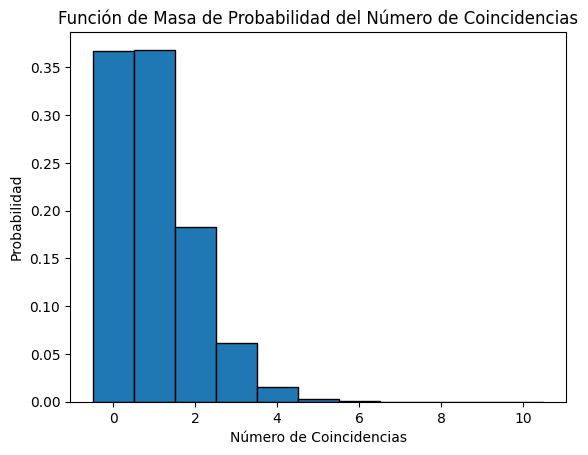

Media del número de coincidencias: 1.0009
Varianza del número de coincidencias: 1.0016
Probabilidad de al menos 3 coincidencias: 0.0808


In [38]:
# La función de masa de probabilidad (PMF) del número de coincidencias
import random
import numpy as np
import matplotlib.pyplot as plt

def experimento_emparejamiento(num_parejas, num_simulaciones):
    num_coincidencias_lista = []

    for _ in range(num_simulaciones):
        # Crear una lista representando a las parejas
        parejas = list(range(num_parejas))

        # Mezclar aleatoriamente la lista para simular emparejamientos aleatorios
        random.shuffle(parejas)

        # Contar el número de coincidencias
        num_coincidencias = sum([pareja[0] == pareja[1] for pareja in zip(range(num_parejas), parejas)])

        num_coincidencias_lista.append(num_coincidencias)

    return num_coincidencias_lista

# Número de parejas
num_parejas = 10

# Número de simulaciones
num_simulaciones = 100000

# Simular el experimento de emparejamiento
num_coincidencias_lista = experimento_emparejamiento(num_parejas, num_simulaciones)

# Graficar la función de masa de probabilidad (PMF) del número de coincidencias
plt.hist(num_coincidencias_lista, bins=np.arange(num_parejas + 2) - 0.5, density=True, align='mid', edgecolor='black')
plt.title('Función de Masa de Probabilidad del Número de Coincidencias')
plt.xlabel('Número de Coincidencias')
plt.ylabel('Probabilidad')
plt.show()

# La media y la varianza del número de coincidencias.
media_coincidencias = np.mean(num_coincidencias_lista)
varianza_coincidencias = np.var(num_coincidencias_lista)

print(f"Media del número de coincidencias: {media_coincidencias:.4f}")
print(f"Varianza del número de coincidencias: {varianza_coincidencias:.4f}")

#La probabilidad de al menos 3 coincidencias.
prob_al_menos_3_coincidencias = np.mean(np.array(num_coincidencias_lista) >= 3)
print(f"Probabilidad de al menos 3 coincidencias: {prob_al_menos_3_coincidencias:.4f}")